In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import array_to_latex as ltx

In [21]:
def covariance(x,y):
    c=np.inner(y,x)/len(x)-(sum(x)/len(x))*(sum(y)/len(y))
    return c
def rate_error(x,y,k):
    c = ((len(y)-2)**-0.5)*((covariance(y,y)/covariance(x,x)-k**2)**0.5)
    return c

In [22]:
data_array = pd.read_csv("datacsv.csv",  sep=";", decimal=",")
t=data_array.iloc[:,4:].to_numpy()
data_array

,t,N,T,"l,cm",l^2,T^2
0,72.04,23,3.13,100,10000,9.81
1,37.78,12,3.15,100,10000,9.91
2,57.65,20,2.88,90,8100,8.31
3,57.66,20,2.88,90,8100,8.31
4,106.74,37,2.88,90,8100,8.32
5,54.84,19,2.89,90,8100,8.33
6,57.88,20,2.89,90,8100,8.38
7,79.01,30,2.63,80,6400,6.94
8,55.16,21,2.63,80,6400,6.90
9,50,21,2.38,70,4900,5.67


In [23]:
ltx.to_ltx(data_array)

\begin{tabular}{lrrrrrr}
\toprule
     & t & N & T & l,cm & l^2 & T^2 \\\n\midrule
 0 &  72.04  &  23.00 &  3.13 &  100.00 &  10000.00 &  9.81\\
 1 &  37.78  &  12.00 &  3.15 &  100.00 &  10000.00 &  9.91\\
 2 &  57.65  &  20.00 &  2.88 &  90.00 &  8100.00 &  8.31\\
 3 &  57.66  &  20.00 &  2.88 &  90.00 &  8100.00 &  8.31\\
 4 &  106.74 &  37.00 &  2.88 &  90.00 &  8100.00 &  8.32\\
 5 &  54.84  &  19.00 &  2.89 &  90.00 &  8100.00 &  8.33\\
 6 &  57.88  &  20.00 &  2.89 &  90.00 &  8100.00 &  8.38\\
 7 &  79.01  &  30.00 &  2.63 &  80.00 &  6400.00 &  6.94\\
 8 &  55.16  &  21.00 &  2.63 &  80.00 &  6400.00 &  6.90\\
 9 &  50     &  21.00 &  2.38 &  70.00 &  4900.00 &  5.67\\
 10 &  45.09  &  21.00 &  2.15 &  60.00 &  3600.00 &  4.61\\
 11 &  48.45  &  25.00 &  1.94 &  50.00 &  2500.00 &  3.76\\
 12 &  46.16  &  24.00 &  1.92 &  50.00 &  2500.00 &  3.70\\
\bottomrule
\end{tabular}


In [24]:
l,T=t[:,0].astype(float)/100,t[:,1].astype(float)
l

array([100., 100.,  81.,  81.,  81.,  81.,  81.,  64.,  64.,  49.,  36.,
        25.,  25.])

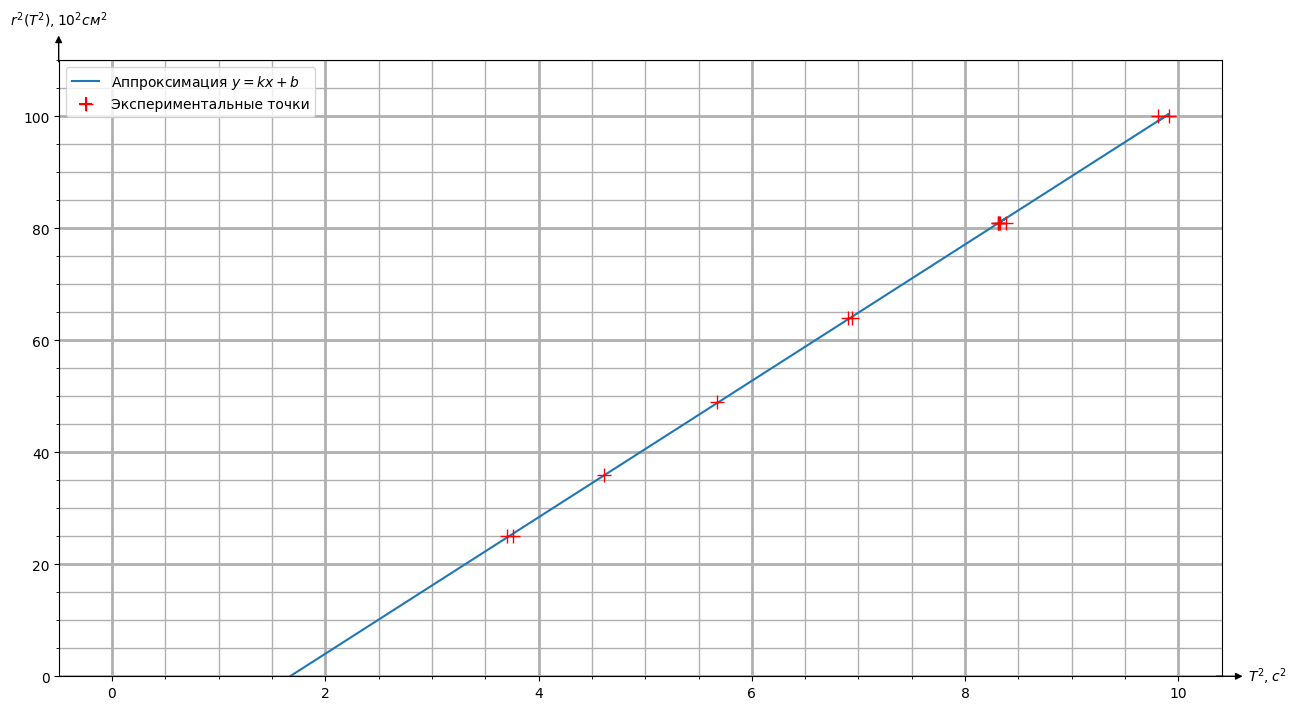

In [36]:
plt.figure(figsize=(15,8))

k,b=np.polyfit(T,l,1)

T_fit=b+k*np.append(T,0)
plt.plot(np.append(T,0),T_fit, label='Аппроксимация $y=kx+b$')

#x_err=np.array([0.03,0.01,0.01,0.03,0.05])
#y_err=np.array([0.1,0.1,0.2,0.2,0.3])
plt.errorbar(T,l, yerr=0, xerr=0, color='r',fmt='+',ms='10', label='Экспериментальные точки') 

plt.ylim(0,110)
#plt.ylim(0, 10)

#— Decorate the spins
arrow_length = 25 # In points

# X-axis arrow
plt.annotate('$T^2, c^2$', xy=(0.993, 0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$r^2(T^2), 10^2 см^2$', xy=(-0.5, 0.993), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

#plt.savefig(f'graphic.eps')

plt.legend(loc = 'upper left')
plt.savefig(f'graphic.png')

plt.show()

In [26]:
k

12.18360723990647

In [27]:
rate_error(T,l,k),rate_error(T,l,k)/k*100

(0.05744770318589165, 0.47151637486906267)